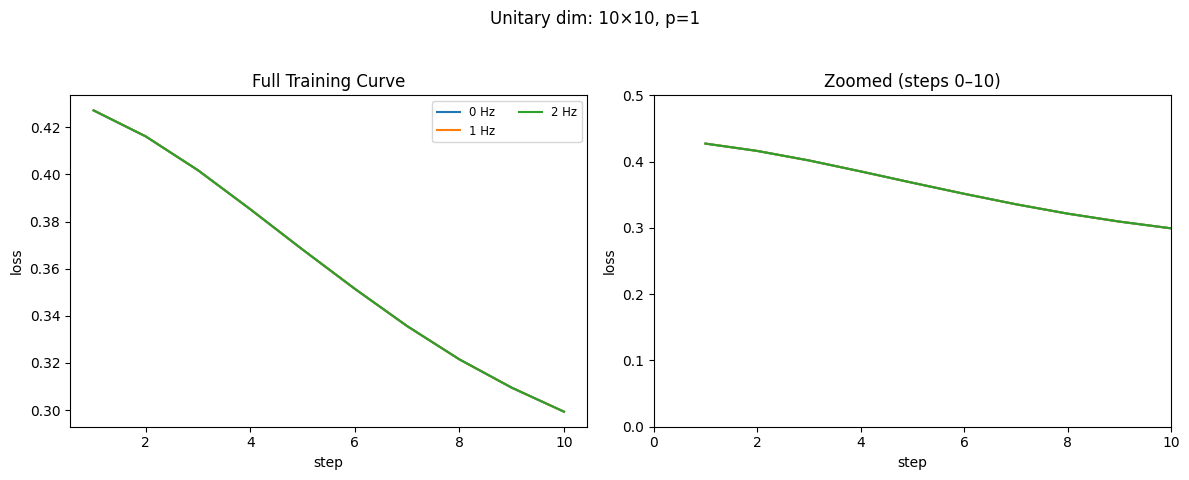

In [ ]:
from p_pack import globals as g

data_folder   = "test-reup-fix"
# data_folder   = "reup-vary-1p"
min_freq    = 0
max_freq      = 2
x_min = 0
x_max = 10
y_min= 0
y_max=0.5
prefix = 'f'
# create two side-by-side plots with independent y-axes
fig, (ax_full, ax_zoom) = g.plt.subplots(1, 2, figsize=(12, 5))

script_dir = g.os.getcwd()  # directory where this script is located
parent_dir   = g.os.path.abspath(g.os.path.join(script_dir, ".."))
data_folder_2 = g.os.path.join(parent_dir, "work", data_folder)

for freq in range(min_freq, max_freq + 1):
    data_name    = f"{prefix}{freq}.npz"
    globals_name = f"{prefix}{freq}g.npz"

    # load
    out      = g.np.load(g.os.path.join(data_folder_2, data_name))
    steps    = out["loss_mem"][:, 0].astype(int)
    losses   = out["loss_mem"][:, 1].astype(float)

    # plot on both axes
    ax_full.plot(steps, losses, linewidth=1.5, label=f"{freq} Hz")
    ax_zoom.plot(steps, losses, linewidth=1.5, label=f"{freq} Hz")

# format the full-range plot
ax_full.set(
    xlabel="step",
    ylabel="loss",
    title="Full Training Curve"
)

# format the zoomed-in plot with its own y-limits
ax_zoom.set(
    xlim=(x_min, x_max),
    ylim=(y_min, y_max),
    xlabel="step",
    ylabel="loss",
    title=f"Zoomed (steps {x_min}–{x_max})"
)

# single legend on the full plot
handles, labels = ax_full.get_legend_handles_labels()
ax_full.legend(handles, labels, loc="upper right", ncol=2, fontsize="small")

# overall title
gl = g.np.load(g.os.path.join(data_folder_2, f"{prefix}{max_freq}g.npz"))
shape = out["carry_0"].shape
fig.suptitle(
    f"Unitary dim: {2*shape[1]}×{2*shape[1]}, p={gl['p_suc_inputs'].item()}"
)

g.plt.tight_layout(rect=[0, 0.03, 1, 0.95])
g.plt.show()


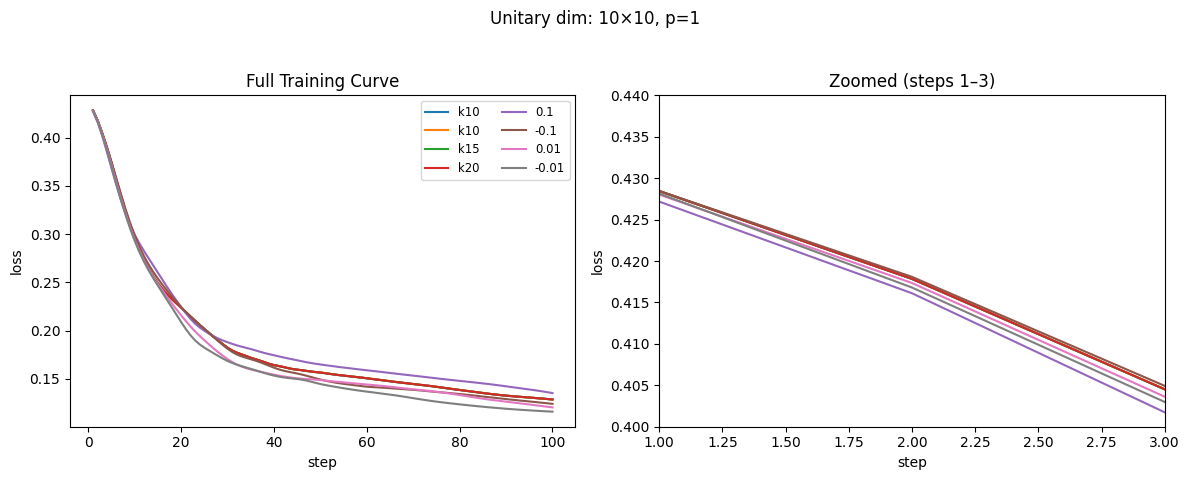

In [26]:
from p_pack import globals as g
from pathlib import Path

# -------- Configuration --------
data_folder = "init_phases-2"
file_indent = 'k'
indexes_to_plot = [0, 1, 2, 3, 4, 5, 6, 7]   #Choose the indexes you want to plot
legend_names = ["k10", "k10", "k15", "k20", "0.1", "-0.1", "0.01", "-0.01"]  # Custom labels, must match index order
x_min = 1
x_max = 3
y_min = 0.4
y_max = 0.44

# Create two side-by-side plots
fig, (ax_full, ax_zoom) = g.plt.subplots(1, 2, figsize=(12, 5))

# Set data folder path
script_dir = g.os.getcwd()
parent_dir = g.os.path.abspath(g.os.path.join(script_dir, ".."))
data_folder_path = g.os.path.join(parent_dir, "work", data_folder)

# Loop over the selected indexes and legend labels
for idx, label in zip(indexes_to_plot, legend_names):
    # Match file pattern: it{idx}k{var}.npz
    # Load file dynamically by matching prefix
    matches = list(Path(data_folder_path).glob(f"it{idx}{file_indent}*g.npz"))
    if not matches:
        print(f"[Warning] Global file for index {idx} not found.")
        continue

    global_name = matches[0].name
    data_name = global_name.replace("g.npz", ".npz")

    data_path = g.os.path.join(data_folder_path, data_name)
    globals_path = g.os.path.join(data_folder_path, global_name)

    # Load data
    out = g.np.load(data_path)
    steps = out["loss_mem"][:, 0].astype(int)
    losses = out["loss_mem"][:, 1].astype(float)

    ax_full.plot(steps, losses, linewidth=1.5, label=label)
    ax_zoom.plot(steps, losses, linewidth=1.5, label=label)

# Set axis labels and zoom
ax_full.set(
    xlabel="step",
    ylabel="loss",
    title="Full Training Curve"
)

ax_zoom.set(
    xlim=(x_min, x_max),
    ylim=(y_min, y_max),
    xlabel="step",
    ylabel="loss",
    title=f"Zoomed (steps {x_min}–{x_max})"
)

# Legend
handles, labels = ax_full.get_legend_handles_labels()
ax_full.legend(handles, labels, loc="upper right", ncol=2, fontsize="small")

# Use last loaded global file for title
gl = g.np.load(globals_path)
shape = out["carry_0"].shape
fig.suptitle(
    f"Unitary dim: {2*shape[1]}×{2*shape[1]}, p={gl['p_suc_inputs'].item()}"
)

g.plt.tight_layout(rect=[0, 0.03, 1, 0.95])
g.plt.show()


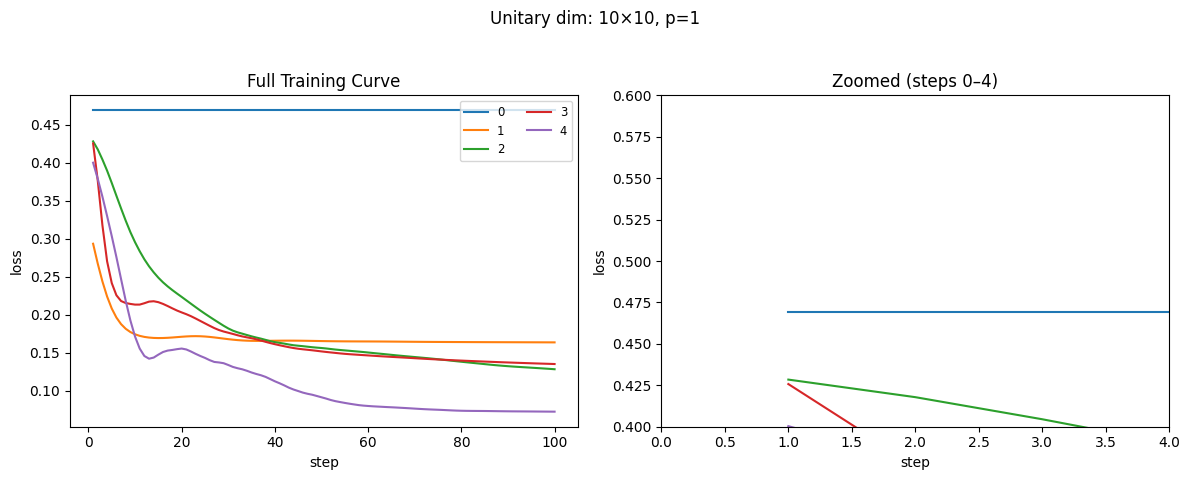

In [ ]:
# ---- Cell 2: init_phases-2 curves with optional test-loss lines ----
from p_pack import globals as g
from pathlib import Path

# -------- Configuration --------
data_folder = "reup-vary-1p-edge/Learning"
file_indent = 'k'
indexes_to_plot = [0, 1, 2, 3, 4]
legend_names = ["10", "10", "15", "20"]
x_min = 0
x_max = 4
y_min = 0.4
y_max = 0.44
plot_test_loss = 1  # set to 1 to show test loss lines
test_loss_folder = "reup-vary-1p-edge/test-1p-edge"

# Create two side-by-side plots
fig, (ax_full, ax_zoom) = g.plt.subplots(1, 2, figsize=(12, 5))

# Set data folder path
script_dir = g.os.getcwd()
parent_dir = g.os.path.abspath(g.os.path.join(script_dir, ".."))
data_folder_path = g.os.path.join(parent_dir, "work", data_folder)
test_folder_path = g.os.path.join(parent_dir, "work", test_loss_folder)

# Loop over the selected indexes and legend labels
for idx, label in zip(indexes_to_plot, legend_names):
    matches = list(Path(data_folder_path).glob(f"it{idx}{file_indent}*g.npz"))
    if not matches:
        print(f"[Warning] Global file for index {idx} not found.")
        continue

    global_name = matches[0].name
    data_name = global_name.replace("g.npz", ".npz")

    data_path = g.os.path.join(data_folder_path, data_name)
    globals_path = g.os.path.join(data_folder_path, global_name)

    out = g.np.load(data_path)
    steps = out["loss_mem"][:, 0].astype(int)
    losses = out["loss_mem"][:, 1].astype(float)

    ax_full.plot(steps, losses, linewidth=1.5, label=label)
    ax_zoom.plot(steps, losses, linewidth=1.5, label=label)

    if plot_test_loss:
        test_name = 'tl' + global_name[2:].replace('g.npz', '.npz')
        test_path = g.os.path.join(test_folder_path, test_name)
        if g.os.path.exists(test_path):
            tl = g.np.load(test_path)['test_loss'].item()
            ax_full.axline((0, tl), (1, tl), linestyle='--', label=f'test {label}')
            ax_zoom.axline((0, tl), (1, tl), linestyle='--')
        else:
            print(f"[Warning] Test loss file {test_name} not found.")

ax_full.set(xlabel='step', ylabel='loss', title='Full Training Curve')
ax_zoom.set(xlim=(x_min, x_max), ylim=(y_min, y_max), xlabel='step', ylabel='loss',
            title=f'Zoomed (steps {x_min}–{x_max})')

handles, labels = ax_full.get_legend_handles_labels()
ax_full.legend(handles, labels, loc='upper right', ncol=2, fontsize='small')

gl = g.np.load(globals_path)
shape = out['carry_0'].shape
fig.suptitle(
    f"Unitary dim: {2*shape[1]}×{2*shape[1]}, p={gl['p_suc_inputs'].item()}"
)

g.plt.tight_layout(rect=[0, 0.03, 1, 0.95])
g.plt.show()

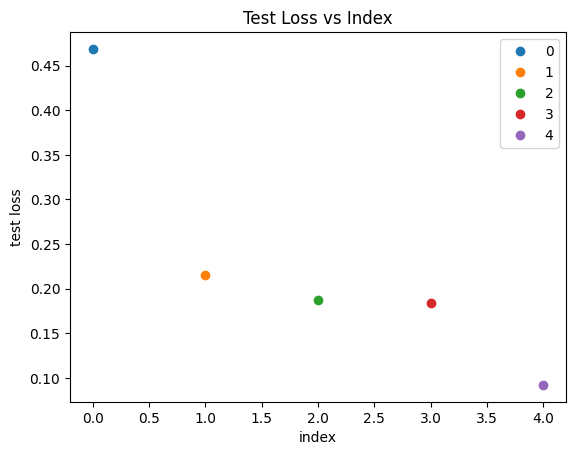

In [10]:
# ---- Cell 3: plot test loss vs. index ----
from p_pack import globals as g
from pathlib import Path

test_loss_folder = "reup-vary-1p-edge/test-1p-edge"
file_indent = 'tl'
indexes_to_plot = [0, 1, 2, 3, 4]
legend_names = ["0", "1", "2", "3", "4"]

fig, ax = g.plt.subplots()

script_dir = g.os.getcwd()
parent_dir = g.os.path.abspath(g.os.path.join(script_dir, '..'))
test_folder_path = g.os.path.join(parent_dir, 'work', test_loss_folder)

test_vals = []
for idx, label in zip(indexes_to_plot, legend_names):
    matches = list(Path(test_folder_path).glob(f'tl{idx}*.npz'))
    if not matches:
        print(f'[Warning] Test loss file for index {idx} not found.')
        continue
    tl = g.np.load(matches[0])['test_loss'].item()
    test_vals.append(tl)
    ax.plot(idx, tl, 'o', label=label)

ax.set(xlabel='index', ylabel='test loss', title='Test Loss vs Index')
ax.legend()
g.plt.show()
